In [23]:
import numpy as np 
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

# Распределения 

## Практический кейс: нужно сравнить 2 выборки и выяснить отличаются ли средние 

In [10]:
data1 = [12, 15, 14, 10, 13]
data2 = [10, 9, 12, 11, 8]
t_statistic, p_value = stats.ttest_ind(data1, data2)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
# О чем говорит статистический вывод в целом?
# Что такое т-статистика?
# Что такое p.value?

T-statistic: 2.514474228374849, P-value: 0.0361183129071552


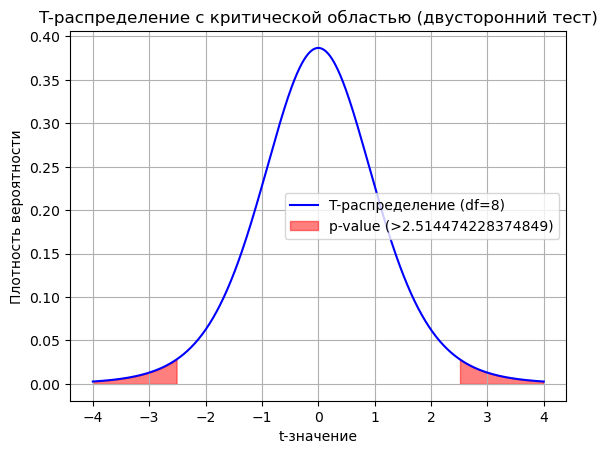

In [20]:
df = len(data1) + len(data2) - 2  # Степени свободы (для простоты - кол-во наблюдений минус 2 для двустороннего и 1 для одностороннего)
t_stat = t_statistic  # Наблюдаемое значение t-статистики
alpha = 0.05  # Уровень значимости (то, с чем будет сравнивать p.value)

x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.plot(x, y, 'b-', label=f'T-распределение (df={df})')
x_crit_right = np.linspace(t_stat, 4, 200)
y_crit_right = t.pdf(x_crit_right, df)
plt.fill_between(x_crit_right, y_crit_right, color='red', alpha=0.5, label=f'p-value (>{t_stat})')

x_crit_left = np.linspace(-4, -t_stat, 200)
y_crit_left = t.pdf(x_crit_left, df)
plt.fill_between(x_crit_left, y_crit_left, color='red', alpha=0.5)

plt.title('T-распределение с критической областью (двусторонний тест)')
plt.xlabel('t-значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

## Подробное описание получившихся выводов

### 1. **T-распределение (df={df})**
   - Это кривая t-распределения (распределение Стьюдента) для заданного числа **степеней свободы (df)**. Чем меньше df, тем более "плоское" и широкое распределение. С увеличением df, t-распределение становится ближе к нормальному распределению.
   - **df (степени свободы)** рассчитываются как \( df = len(data1) + len(data2) - 2 \), что означает, что количество степеней свободы основано на размере выборок: по одному параметру "снимается" для каждой выборки.

### 2. **T-значение (t-statistic)**
   - Это наблюдаемое значение t-статистики, полученное в результате проведения t-теста. Оно является мерой разницы между средними значениями двух выборок, нормированной на их разброс.
   - **t-statistic** рассчитывается на основе данных и может быть положительным или отрицательным. Это числовое значение указывает, насколько различаются средние значения выборок.

### 3. **Критическая область (красные заштрихованные области)**
   - Критическая область — это область, где значения t-статистики настолько экстремальны, что при верной нулевой гипотезе вероятность их появления очень мала (меньше уровня значимости \( \alpha \)).
   - **Для двухстороннего теста** заштрихованы две области: справа и слева от нуля (отрицательная и положительная критические области). Они показывают, что мы проверяем, отклоняется ли значение t-статистики в обе стороны от среднего.
   - Критические области показывают, где значения t-статистики оказываются достаточно экстремальными для того, чтобы отклонить нулевую гипотезу.

### 4. **p-value (красные заштрихованные области)**
   - **p-value** — это вероятность получения наблюдаемого значения t-статистики (или еще более экстремального) при условии, что нулевая гипотеза верна. В контексте графика, p-value — это площадь под кривой в критической области (области, заштрихованные красным).
   - Чем дальше наблюдаемое значение t-статистики от центра распределения (от 0), тем меньше вероятность (p-value), что разница между выборками случайна.

### 5. **Уровень значимости (\( \alpha \))**
   - Уровень значимости \( \alpha = 0.05 \) — это пороговое значение, с которым мы сравниваем p-value. Если p-value меньше или равно \( \alpha \), мы отклоняем нулевую гипотезу, потому что вероятность получить такие данные случайно меньше 5%.
   - На графике это представлено через заштрихованные области, которые показывают экстремальные значения t-статистики, вероятность которых меньше уровня \( \alpha \).

### 6. **Ось абсцисс (x)**
   - На оси абсцисс (горизонтальной оси) показаны возможные значения **t-статистики**, которые варьируются от -4 до 4. Эти значения показывают, насколько сильно средние выборок различаются относительно их разброса.

### 7. **Ось ординат (y)**
   - Ось ординат (вертикальная ось) показывает **плотность вероятности** (или функцию плотности вероятности — PDF). Чем выше плотность вероятности, тем более вероятно получение соответствующего значения t-статистики. Центр кривой t-распределения обычно соответствует нулю, так как это наиболее вероятное значение, если нулевая гипотеза верна.


## Таблицы критических значений

Таблица критических значений — это инструмент, который используется в статистике для нахождения критических значений статистических распределений, необходимых для проверки гипотез и принятия статистических решений. Эти таблицы помогают исследователям и аналитикам определить границы, за которыми результаты наблюдений могут считаться статистически значимыми.
Ссылка на таблицу: https://statpsy.ru/t-student/t-test-tablica/

Алгоритм работы:
1) Откройте таблицу критических значений t и найдите строку для df = 58.
2) Найдите столбец для уровня значимости 0.025 (поскольку это двусторонний тест, уровень значимости делится на 2).
3) Сравните с вашим значением: Если ваш t-статистика больше критического значения из таблицы, то вы отклоняете нулевую гипотезу.

## Еще немного про распределения: функция распределения и плотность вероятности.

## Определение функции распределения

**Функция распределения** \( F(x) \) (или функция распределения вероятностей) описывает вероятность того, что случайная величина \( X \) примет значение, меньшее или равное \( x \):

\[ 
F(x) = P(X \leq x) 
\]

### Практический смысл:
- Позволяет оценивать вероятность того, что случайная величина примет определённое значение или значение в заданном диапазоне. Например, если вы хотите узнать, какова вероятность, что рост человека меньше 170 см, вы используете функцию распределения.
- Используется в статистическом анализе и проверке гипотез.

---

## Производная функции распределения

**Определение**: Производная функции распределения \( F(x) \) по \( x \) представляет собой плотность вероятности \( f(x) \) (для непрерывных случайных величин):

\[ 
f(x) = \frac{dF(x)}{dx} 
\]

Для дискретных случайных величин это просто функция вероятностей \( P(X = x) \).

### Практический смысл:
- Плотность вероятности (или функция вероятности для дискретных величин) показывает, какова вероятность того, что случайная величина примет конкретное значение. Например, для непрерывной случайной величины плотность вероятности может показывать, какова вероятность нахождения значения в малом интервале около \( x \).
- Важно для анализа форм распределения и определения таких характеристик, как среднее значение и дисперсия.

---

## Пример

**Функция распределения**: Допустим, у вас есть распределение роста людей. Функция распределения может показать, что 70% людей имеют рост менее 175 см (т.е. \( F(175) = 0.7 \)).

**Плотность вероятности**: Теперь, если вы хотите узнать, насколько вероятно, что рост человека именно 175 см, вам нужна производная \( f(175) \). Если, например, \( f(175) = 0.02 \), это говорит о том, что вероятность встретить человека с ростом ровно 175 см в небольшом интервале вокруг этого значения составляет 2%.

---

## Таким образом

Функция распределения даёт информацию о кумулятивной вероятности, а производная даёт информацию о вероятности конкретных значений (или интервалов для непрерывных величин).
